<a href="https://colab.research.google.com/github/MatiasCostanzo2726/BigDataUBA-Grupo9/blob/main/Big_Data_TP3_Grupo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [3]:
import os

In [1]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T104.dta to usu_individual_T104.dta


In [9]:
individual_2004 = pd.read_stata('usu_individual_T104.dta')

In [11]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124.xlsx


In [12]:
individual_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [13]:
individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [14]:
individual_2024[individual_2024["REGION"]==1]

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
16,TQRMNOQTTHLOLSCDEIJAH00807503,2024,3,1,8,1,1,S,33,1774,...,NaN,8,490000.0,7,NaN,7,7.0,NaN,7,3113
17,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,1,1,1,S,33,1538,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
18,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,2,1,1,S,33,1538,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
19,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,3,1,1,S,33,1538,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
20,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,4,1,1,S,33,1538,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47526,TQRMNOQTSHMLLLCDEIIAD00812059,2024,3,1,2,1,1,S,32,2871,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47527,TQRMNOQTSHMLLLCDEIIAD00812059,2024,3,1,3,0,1,S,32,2871,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47528,TQRMNOPRWHJNKUCDEIIAD00866169,2024,3,1,1,1,1,S,32,146,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47529,TQRMNOPRWHJNKUCDEIIAD00866169,2024,3,1,2,1,1,S,32,146,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [15]:
individual_2004.reset_index(inplace=True)
individual_GBA_2004 = individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

In [16]:
individual_2024.reset_index(inplace=True)
individual_GBA_2024 = individual_2024[individual_2024["REGION"]==1]

In [17]:
edad_2004 = individual_GBA_2004['ch06']
edad_2004

,ch06
0,79.0
1,67.0
2,74.0
3,54.0
4,51.0
...,...
7642,1.0
7643,51.0
7644,55.0
7645,12.0


In [18]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Ocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
1,1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,00,,00,00,,00,0.0,0.0,0.0,00000
3,3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
5,5,125558,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
6,6,125558,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
7,7,125599,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7637,287998,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,Tiene plan jefas y jefes,0.0,0.0,00000
7640,7640,288171,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [19]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Desocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
8,8,125599,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
14,14,125783,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,03,,03,03,,01,0.0,0.0,0.0,00000
19,19,126175,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,08,0.0,0.0,0.0,00000
24,24,126225,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,09,0.0,0.0,0.0,00000
33,33,127045,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,03,04,,01,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,7536,284974,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,07,07,,08,0.0,0.0,0.0,00000
7586,7586,286364,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,0.0,0.0,0.0,00000
7609,7609,287100,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7635,7635,287810,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000


In [20]:
edad_2024 = individual_GBA_2024['CH06']
edad_2024

,CH06
16,11
17,49
18,22
19,16
20,77
...,...
47526,35
47527,1
47528,51
47529,53


In [21]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==1]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
17,17,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,1,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
18,18,TQRMNOUXSHLOLSCDEIJAH00807505,2024,3,1,2,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
21,21,TQRMNOPRQHJMMPCDEIJAH00862983,2024,3,1,1,1,1,S,33,...,NaN,1,60000.0,1,NaN,1,1.0,NaN,1,1937
27,27,TQRMNOPVTHLMLTCDEIJAH00807506,2024,3,1,2,1,1,S,33,...,NaN,8,750000.0,9,NaN,8,9.0,NaN,9,1193
28,28,TQRMNOSXTHLMLTCDEIJAH00863021,2024,3,1,1,1,1,S,33,...,NaN,9,383200.0,6,NaN,5,6.0,NaN,6,1635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47525,47525,TQRMNOQTSHMLLLCDEIIAD00812059,2024,3,1,1,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47526,47526,TQRMNOQTSHMLLLCDEIIAD00812059,2024,3,1,2,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47528,47528,TQRMNOPRWHJNKUCDEIIAD00866169,2024,3,1,1,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
47529,47529,TQRMNOPRWHJNKUCDEIIAD00866169,2024,3,1,2,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [22]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==2]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
86,86,TQRMNOQRPHKNNTCDEIIAD00868801,2024,3,1,1,1,1,S,32,...,NaN,2,325000.00,5,NaN,5,5.0,NaN,2,2903
92,92,TQRMNORUQHLLKOCDEIJAH00807525,2024,3,1,2,1,1,S,33,...,NaN,6,262500.00,4,NaN,4,4.0,NaN,4,4234
331,331,TQRMNOPTXHJNRPCDEIJAH00863637,2024,3,1,1,1,1,S,33,...,NaN,2,131666.67,2,NaN,1,1.0,NaN,2,3459
378,378,TQRMNORTYHMOTSCDEIJAH00812755,2024,3,1,1,1,1,S,33,...,NaN,2,72633.33,1,NaN,1,1.0,NaN,1,1754
379,379,TQRMNORTYHMOTSCDEIJAH00812755,2024,3,1,2,1,1,S,33,...,NaN,2,72633.33,1,NaN,1,1.0,NaN,1,1754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47060,47060,TQRMNOPUUHKMQOCDEIJAH00871344,2024,3,1,3,1,1,S,33,...,NaN,1,102333.33,1,NaN,1,1.0,NaN,1,3736
47081,47081,TQRMNOQPSHKKKRCDEIIAD00871402,2024,3,1,3,1,1,S,32,...,NaN,5,300000.00,4,NaN,4,4.0,NaN,2,1889
47321,47321,TQRMNOQPVHJNRPCDEIJAH00866231,2024,3,1,1,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
47373,47373,TQRMNOSQRHJLTNCDEIJAH00866638,2024,3,1,4,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


In [23]:
estado_dict = {0: "Entrevista individual no realizada (no respuesta al cuestionario individual)", 1: "Ocupado", 2: "Desocupado", 3: "Inactivo", 4: "Menor de 10 años"}
individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)
individual_GBA_2024["estado"].dropna()

<ipython-input-23-046f527b9275>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)


,estado
16,Inactivo
17,Ocupado
18,Ocupado
19,Inactivo
20,Inactivo
...,...
47526,Ocupado
47527,Menor de 10 años
47528,Ocupado
47529,Ocupado


In [24]:
individual_GBA_2004["estado"].str.strip("0.0").dropna()

,estado
0,Inactivo
1,Ocupado
2,Inactivo
3,Ocupado
4,Inactivo
...,...
7642,Menor de 10 años
7643,Ocupado
7644,Ocupado
7645,Inactivo


In [25]:
#Parte 1, Ejercicio 1
edad_2004_clean = edad_2004.copy()
edad_2004_clean = edad_2004_clean.replace("Menos de 1 año", 0)
edad_2004_clean = edad_2004_clean.replace("98 y más años", 99)
edad2_2004 = pd.to_numeric(edad_2004_clean) ** 2
edad2_2004

<ipython-input-25-f58648c7b12a>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  edad_2004_clean = edad_2004_clean.replace("Menos de 1 año", 0)
<ipython-input-25-f58648c7b12a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edad_2004_clean = edad_2004_clean.replace("98 y más años", 99)
<ipython-input-25-f58648c7b12a>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.ca

,ch06
0,6241.0
1,4489.0
2,5476.0
3,2916.0
4,2601.0
...,...
7642,1.0
7643,2601.0
7644,3025.0
7645,144.0


In [26]:
edad_2024_clean = edad_2024.copy()
edad2_2024 = pd.to_numeric(edad_2024_clean) ** 2
edad2_2024

,CH06
16,121
17,2401
18,484
19,256
20,5929
...,...
47526,1225
47527,1
47528,2601
47529,2809


<ipython-input-29-bf2bba8b2fe8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean, errors='coerce')
<ipython-input-29-bf2bba8b2fe8>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  individual_GBA_2004['edad_2004_nu

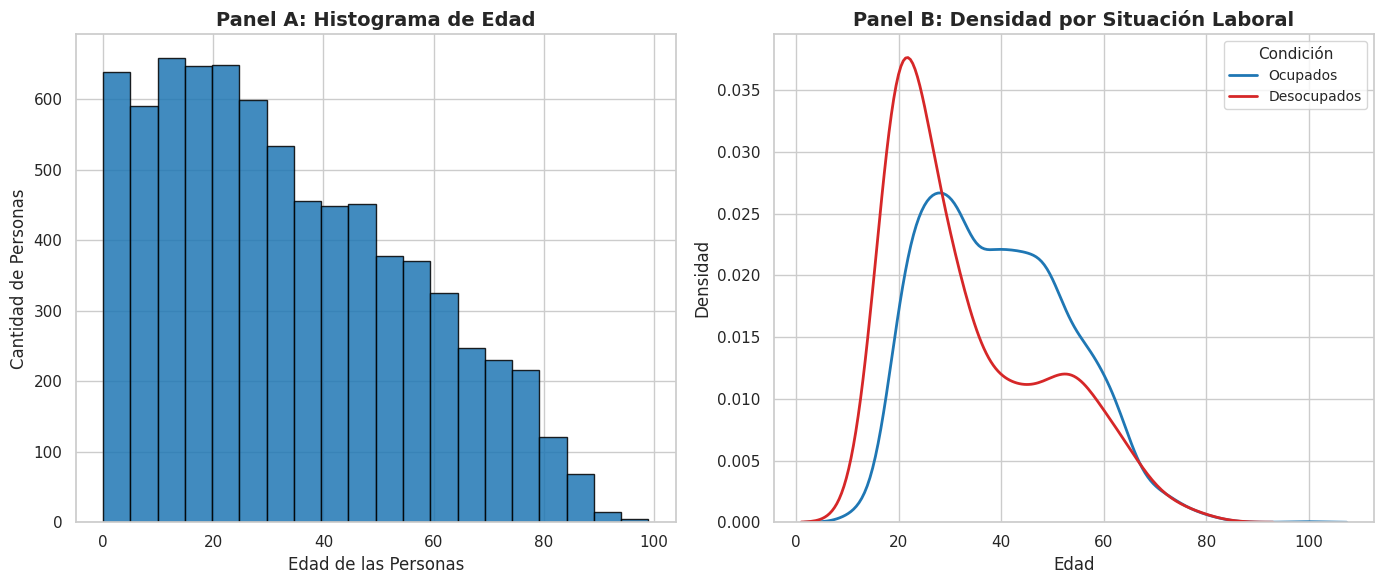

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Seteo del estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colores
color_azul = "#1f77b4"
color_rojo = "#d62728"

# Panel A: Histograma de edad
individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean, errors='coerce')
individual_GBA_2004['edad_2004_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)

axes[0].hist(individual_GBA_2004['edad_2004_numeric'].dropna(), bins=20, color=color_azul, edgecolor='black', alpha=0.85)
axes[0].set_title("Panel A: Histograma de Edad", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Edad de las Personas", fontsize=12)
axes[0].set_ylabel("Cantidad de Personas", fontsize=12)

# Panel B: Densidad por situación laboral
ocupados_data = individual_GBA_2004[individual_GBA_2004["estado"] == "Ocupado"]['edad_2004_numeric'].dropna()
desocupados_data = individual_GBA_2004[individual_GBA_2004["estado"] == "Desocupado"]['edad_2004_numeric'].dropna()

sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1], color=color_azul, linewidth=2)
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1], color=color_rojo, linewidth=2)

axes[1].set_title("Panel B: Densidad por Situación Laboral", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Edad", fontsize=12)
axes[1].set_ylabel("Densidad", fontsize=12)
axes[1].legend(title="Condición", fontsize=10, title_fontsize=11)

# Ajustar diseño y guardar
plt.tight_layout()
plt.savefig("grafico_ej1_2004_mejorado.png", bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-99-fbd12ece3479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
<ipython-input-99-fbd12ece3479>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  individual_GBA_2024['edad_2024_numeric'].replace([np

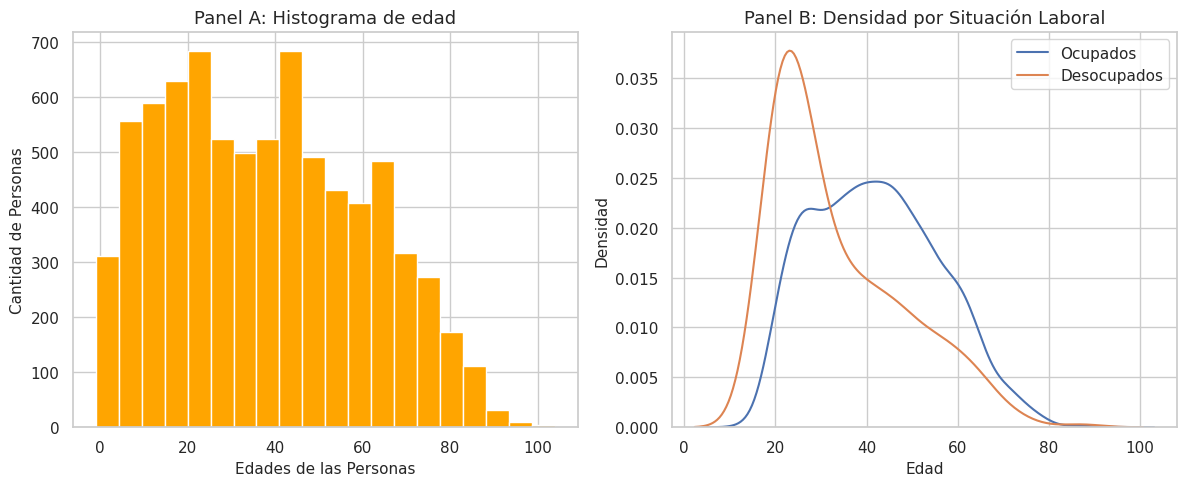

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Panel A: Histograma de edad
individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
individual_GBA_2024['edad_2024_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
axes[0].hist(edad_2024_clean, bins=20, alpha=1, color='orange')
axes[0].set_title("Panel A: Histograma de edad")
axes[0].set_xlabel('Edades de las Personas')
axes[0].set_ylabel('Cantidad de Personas')

# Panel B: Densidad para ocupados y desocupados
ocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Ocupado"]['edad_2024_numeric']
ocupados_data = ocupados_data.replace([np.inf, -np.inf], np.nan)
desocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Desocupado"]['edad_2024_numeric']
desocupados_data = desocupados_data.replace([np.inf, -np.inf], np.nan)
sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1])
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1])
axes[1].set_title("Panel B: Densidad por Situación Laboral")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()
plt.savefig("gráfico ej 1 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [31]:
#En el panel A del año 2004 podemos observar prácticamente que cuantos más años tienen, menos personas hay que contestaron, lo cual es lógico y esperable.
#Mientras que en el panel A pero del año 2024 podemos observar que por personas de 0 a 10 años se respondió mucho menos que en el 2004 y además podemos ver como personas de entre 45 a 55 años respondieron mucho más, por eso aparece esa gran suba.

In [32]:
#En el panel B del año 2004 podemos observar que hay un gran número de desocupados en personas de entre 15 a 25 años, lo cual desciende fuertemente hasta las personas de entre 45 a 55 años que hay un ligero rebote para luego seguir descendiendo y converger con la curva de ocupados. Esta última tiene un comportamiento menos fuerte comenzando un gran ascenso a partir de los 18 años para llegar a un punto máximo en torno a los 30 años, para luego ir descencdiendo levemente hasta los 55 años y a partir de ahi una caída que converge con la de desocupados.
#Mientras que en el panel B pero del año 2024 podemos observar que la curva de desocupados se comporta de manera bastante similar a la curva del año 2004, teniendo una fuerte suba entre los 15 a 22 años alcanzando su punto máximo, para luego descender fuertemente hasta los 35 años donde hay un rebote hasta los 50 años donde vuelve a descender. Luego la curva de ocupados se comporta similr a la curva de ocupados del año 2004 pero esta tiene un punto máximo entre los 45 a 55 años par luego comenzar a descender.

In [ ]:
#Parte 1, Ejercicio 2

In [100]:
# Mapas para reemplazar texto por valores numéricos
ch12_map = {
    "Nan": 0,
    "Jardín/ Preescolar": 1,
    "Primario": 2,
    "EGB": 3,
    "Secundario": 4,
    "Polimodal": 5,
    "Terciario": 6,
    "Universitario": 7,
    "Posgrado Universitario": 8,
    "Educación especial (discapacitado)": 9
}

ch13_map = {
    "Sí": 1,
    "No": 2,
    "Ns./Nr.": 3
}

ch14_map = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": 98,
    "Ns./Nr.": 99
}

# Hacemos una copia para evitar SettingWithCopyWarning
individual_GBA_2004 = individual_GBA_2004.copy()

# Convertimos a string y reemplazamos por los mapas
individual_GBA_2004["ch12"] = individual_GBA_2004["ch12"].astype(str).replace(ch12_map)
individual_GBA_2004["ch13"] = individual_GBA_2004["ch13"].astype(str).replace(ch13_map)
individual_GBA_2004["ch14"] = individual_GBA_2004["ch14"].astype(str).replace(ch14_map)

# Convertimos a numérico por si quedan strings
individual_GBA_2004["ch12"] = pd.to_numeric(individual_GBA_2004["ch12"], errors="coerce")
individual_GBA_2004["ch13"] = pd.to_numeric(individual_GBA_2004["ch13"], errors="coerce")
individual_GBA_2004["ch14"] = pd.to_numeric(individual_GBA_2004["ch14"], errors="coerce")

# Base 2024: suponemos que ya está bien tipada como numérica

# Diccionario que relaciona nivel con años completados
nivel_a_años = {
    1: 0,   # Jardín
    2: 7,   # Primario
    3: 9,   # EGB
    4: 12,  # Secundario
    5: 12,  # Polimodal
    6: 15,  # Terciario
    7: 17,  # Universitario
    8: 20,  # Posgrado
    9: np.nan  # Educación especial
}

# Función para calcular años de educación
def calcular_educ(row, col_ch12, col_ch13, col_ch14):
    ch12 = row[col_ch12]
    ch13 = row[col_ch13]
    ch14 = row[col_ch14]

    if ch12 == 9 or ch14 in [98, 99] or ch13 == 3:
        return np.nan
    elif ch13 == 1:
        return nivel_a_años.get(ch12, np.nan)
    elif ch13 == 2 and ch14 not in [98, 99, 0]:
        return ch14
    return np.nan

# Aplicamos la función
individual_GBA_2004["educ"] = individual_GBA_2004.apply(
    lambda row: calcular_educ(row, "ch12", "ch13", "ch14"), axis=1
)

individual_GBA_2024["educ"] = individual_GBA_2024.apply(
    lambda row: calcular_educ(row, "CH12", "CH13", "CH14"), axis=1
)

# Aseguramos tipo float
individual_GBA_2004["educ"] = pd.to_numeric(individual_GBA_2004["educ"], errors="coerce")
individual_GBA_2024["educ"] = pd.to_numeric(individual_GBA_2024["educ"], errors="coerce")

# Concatenamos ambas bases
base_unida = pd.concat([individual_GBA_2004, individual_GBA_2024], ignore_index=True)

# Estadísticas descriptivas
educ_stats = base_unida["educ"].describe(percentiles=[0.25, 0.5, 0.75])

print("Estadísticas de la variable 'educ':")
print(educ_stats)


Estadísticas de la variable 'educ':
count    13041.000000
mean         7.619584
std          5.125389
min          0.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         20.000000
Name: educ, dtype: float64


<ipython-input-100-562259950d16>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["educ"] = individual_GBA_2024.apply(
<ipython-input-100-562259950d16>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["educ"] = pd.to_numeric(individual_GBA_2024["educ"], errors="coerce")


La variable educ representa los años de educación formal completados. En 2024, el promedio fue de 7,62 años, con una mediana de 7 años. El 25% de la población tiene 3 años o menos de educación formal, y el 75% alcanza hasta 12 años, lo que sugiere una concentración en la educación secundaria completa. El máximo de 20 años corresponde a niveles terciarios/universitarios o posgrados.

<ipython-input-101-0e96e6e213cb>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")


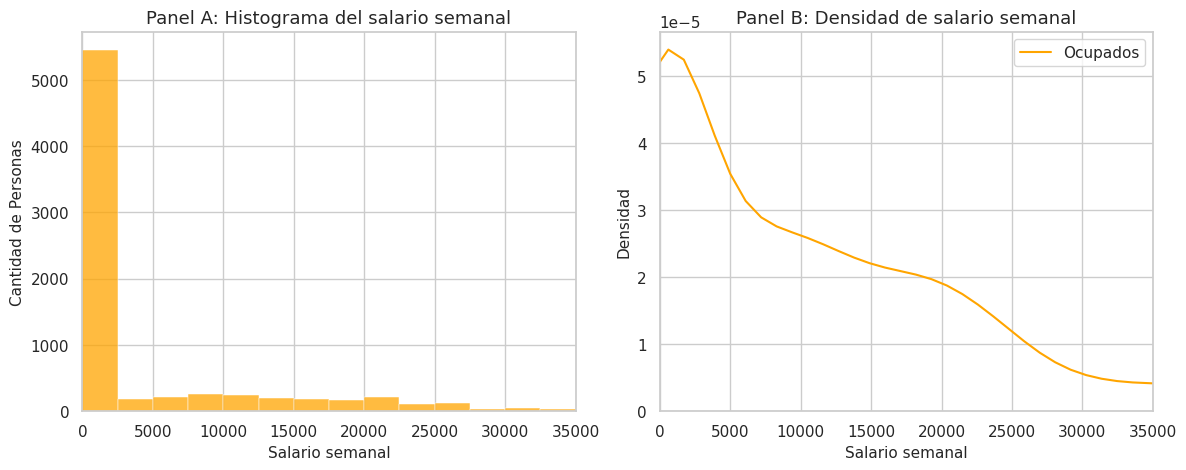

In [101]:
salario_semanal_2024 = individual_GBA_2024["salario_semanal"].dropna()
# Panel A: Histograma de salario semanal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(salario_semanal_2024, bins=80, kde=False, color="orange")
plt.title("Panel A: Histograma del salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de Personas")
plt.xlim(0, 35000)

# Panel B: Kernel para ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Ocupado"]["salario_semanal"]
desocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados.dropna(), label="Ocupados", color="orange")
sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Densidad")
plt.xlim(0, 35000)
plt.legend()
plt.savefig("gráfico ej 3 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

Estadísticas salario semanal 2004 (ajustado a pesos 2024):
mean      4154.583749
std      12988.422819
min          0.000000
p50          0.000000
max     852525.000000
Name: salario_semanal, dtype: float64


<ipython-input-64-966a1c83e530>:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(desocupados_2004.dropna(), label="Desocupados", color="red")


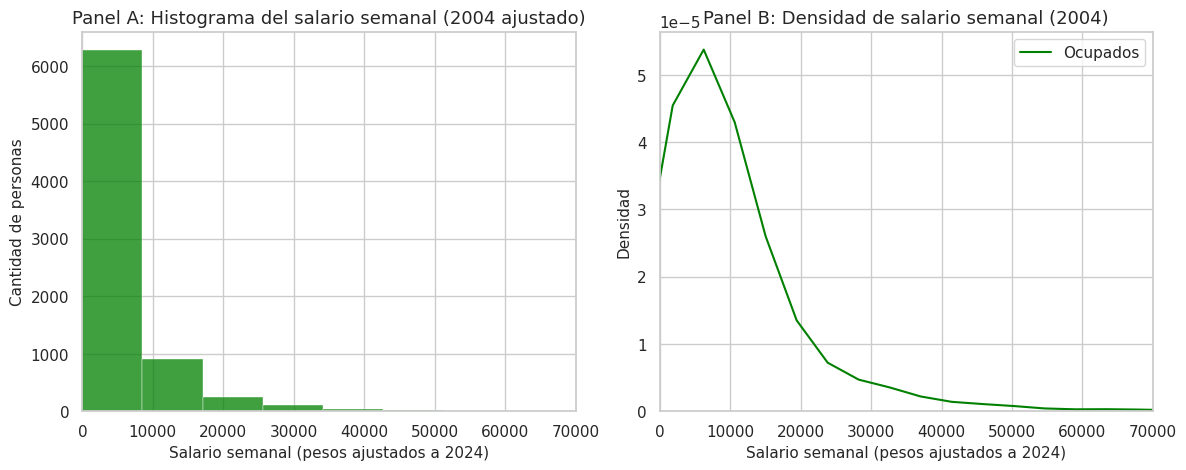

<ipython-input-64-966a1c83e530>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40
<ipython-input-64-966a1c83e530>:66: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(desocupados_2024.dropna(), label="Desocupados", color="red")


Estadísticas salario semanal 2024:
mean      5465.690595
std      12367.534849
min         -0.225000
p50          0.000000
max     200000.000000
Name: salario_semanal, dtype: float64


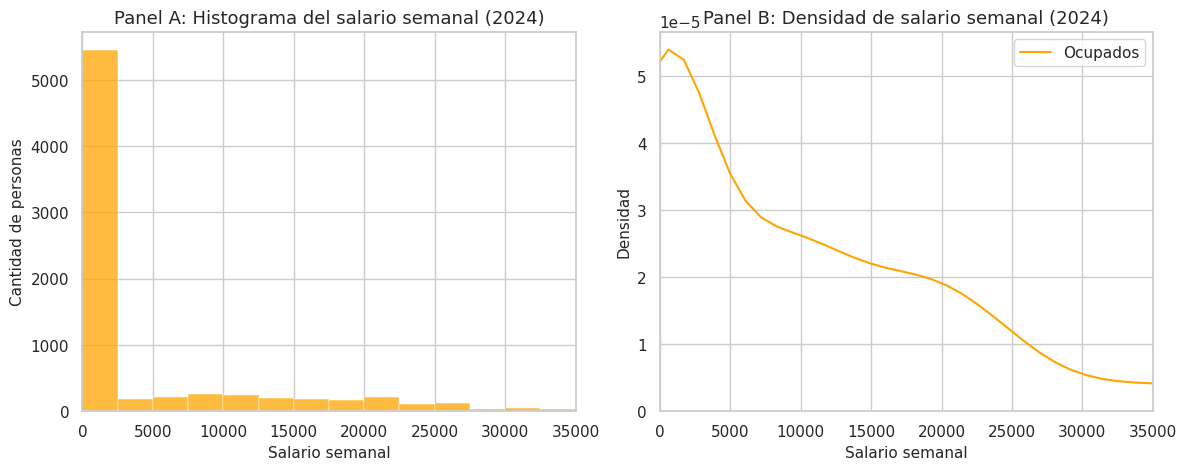

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- PARTE 1: 2004 ---

# Ajuste por inflación
coef_ajuste = 631.5
individual_GBA_2004["ingreso_ajustado"] = individual_GBA_2004["p21"] * coef_ajuste

# Cálculo de salario semanal (ingreso habitual ajustado / 40 hs)
individual_GBA_2004["salario_semanal"] = individual_GBA_2004["ingreso_ajustado"] / 40

# Estadísticas descriptivas
desc_salario_2004 = individual_GBA_2004["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print("Estadísticas salario semanal 2004 (ajustado a pesos 2024):")
print(desc_salario_2004.rename({"50%": "p50"}))

# Panel A: Histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(individual_GBA_2004["salario_semanal"].dropna(), bins=100, kde=False, color="green")
plt.title("Panel A: Histograma del salario semanal (2004 ajustado)")
plt.xlabel("Salario semanal (pesos ajustados a 2024)")
plt.ylabel("Cantidad de personas")
plt.xlim(0, 70000)

# Panel B: Kernel ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados_2004 = individual_GBA_2004[individual_GBA_2004["estado"] == "Ocupado"]["salario_semanal"]
desocupados_2004 = individual_GBA_2004[individual_GBA_2004["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados_2004.dropna(), label="Ocupados", color="green")
sns.kdeplot(desocupados_2004.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal (2004)")
plt.xlabel("Salario semanal (pesos ajustados a 2024)")
plt.ylabel("Densidad")
plt.xlim(0, 70000)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_ej3_2004.png", dpi=300, bbox_inches="tight")
plt.show()

# --- PARTE 2: 2024 ---

# Salario semanal = ingreso habitual dividido 40
individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40

# Estadísticas descriptivas
desc_salario_2024 = individual_GBA_2024["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print("Estadísticas salario semanal 2024:")
print(desc_salario_2024.rename({"50%": "p50"}))

# Panel A: Histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(individual_GBA_2024["salario_semanal"].dropna(), bins=80, kde=False, color="orange")
plt.title("Panel A: Histograma del salario semanal (2024)")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de personas")
plt.xlim(0, 35000)

# Panel B: Kernel ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados_2024 = individual_GBA_2024[individual_GBA_2024["estado"] == "Ocupado"]["salario_semanal"]
desocupados_2024 = individual_GBA_2024[individual_GBA_2024["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados_2024.dropna(), label="Ocupados", color="orange")
sns.kdeplot(desocupados_2024.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal (2024)")
plt.xlabel("Salario semanal")
plt.ylabel("Densidad")
plt.xlim(0, 35000)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_ej3_2024.png", dpi=300, bbox_inches="tight")
plt.show()


In [68]:
#Parte 1, ejercicio 4
horastrab_2004 = individual_GBA_2004["pp3e_tot"].fillna(0) + individual_GBA_2004["pp3f_tot"].fillna(0)
desc_horastrab = horastrab_2004.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      21.758879
std       76.016046
min        0.000000
p50        0.000000
max     1998.000000
dtype: float64


In [69]:
horastrab_2024 = individual_GBA_2024["PP3E_TOT"].fillna(0) + individual_GBA_2024["PP3F_TOT"].fillna(0)
desc_horastrab = horastrab_2024.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      21.758879
std       76.016046
min        0.000000
p50        0.000000
max     1998.000000
dtype: float64


In [ ]:
#La cantidad de horas trabajadas por semana del año 2004, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son un poco mas de 18hs, con una dispersión muy alta, siendo aproximadamente 58 hs y un máximo de 1044hs lo cual eleva el promedio, siendo una cantidad imposible. Mientras que la cantidad de horas trabajadas por semana del año 2024, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son casi 20hs, con una dispersión más alta que en 2004, siendo casi 72 hs y un máximo superior de 1998hs lo cual eleva el promedio por mucho, siendo imposible ese número.

In [76]:
#Parte 1, Ejercicio 5, limpieza y homogeneización de algunas variables más
estado_dict = {1: "Varón", 2: "Mujer"}
individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)
individual_GBA_2024["ch04"].dropna()

<ipython-input-76-7ef6784fe263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)


,ch04
16,Mujer
17,Varón
18,Varón
19,Varón
20,Mujer
...,...
47526,Mujer
47527,Mujer
47528,Varón
47529,Mujer


In [75]:
individual_GBA_2004["ch04"].str.strip("0.0").dropna()

,ch04


In [55]:
estado_dict = {1:"Unido", 2:"Casado", 3:"Separado o divorciado", 4:"Viudo", 5:"Soltero", 6:"Ns./Nr."  }
individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)
individual_GBA_2024["ch07"].dropna()

<ipython-input-55-976e7c5a2b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)


,ch07
16,Soltero
17,Soltero
18,Soltero
19,Soltero
20,Viudo
...,...
47526,Unido
47527,Soltero
47528,Casado
47529,Casado


In [77]:
individual_GBA_2004["ch07"].str.strip("0.0").dropna()

,ch07
0,Viudo
1,Separado o divorciado
2,Viudo
3,Casado
4,Casado
...,...
7642,Soltero
7643,Casado
7644,Casado
7645,Soltero


In [78]:
estado_dict = {1:"Obra social (incluye PAMI) ", 2:"Mutual / Prepaga / Servicio de emergencia", 3:"Planes y seguros públicos", 4:"No paga ni le descuentan", 9:"Ns./Nr.", 12:"Obra social y mutual / prepaga / servicio de emergencia", 13:"Obra social y Planes y Seguros Públicos", 23:"Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos", 123:"Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos "}
individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)
individual_GBA_2024["ch08"].dropna()

<ipython-input-78-1c571afcad72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)


,ch08
16,Obra social (incluye PAMI)
17,Obra social (incluye PAMI)
18,No paga ni le descuentan
19,No paga ni le descuentan
20,Obra social (incluye PAMI)
...,...
47526,Obra social (incluye PAMI)
47527,Obra social (incluye PAMI)
47528,Obra social (incluye PAMI)
47529,Obra social (incluye PAMI)


In [79]:
individual_GBA_2004["ch08"].str.strip("0.0").dropna()

,ch08
0,Obra social (incluye PAMI)
1,No paga ni le descuentan
2,Obra social (incluye PAMI)
3,Mutual/Prepaga/Servicio de emergencia
4,Mutual/Prepaga/Servicio de emergencia
...,...
7642,Mutual/Prepaga/Servicio de emergencia
7643,Obra social (incluye PAMI)
7644,Obra social (incluye PAMI)
7645,Obra social (incluye PAMI)


In [80]:
estado_dict = {1:"Jubilado/pensionado", 2:"Rentista", 3:"Estudiante", 4:"Ama de casa", 5:"Menor de 6 años", 6:"Discapacitado", 7:"Otros"}
individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)
individual_GBA_2024["cat_inac"].dropna()

<ipython-input-80-4a75d152a61b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)


,cat_inac
16,Estudiante
19,Estudiante
20,Ama de casa
22,Ama de casa
23,Estudiante
...,...
47336,Estudiante
47376,Otros
47381,Estudiante
47382,Jubilado/pensionado


In [ ]:
#Parte 2

In [ ]:
#Ejercicio 1

In [103]:
# Edad y edad al cuadrado
individual_GBA_2004.loc[:, 'edad'] = pd.to_numeric(individual_GBA_2004['ch06'], errors='coerce')
individual_GBA_2024.loc[:, 'edad'] = pd.to_numeric(individual_GBA_2024['CH06'], errors='coerce')

individual_GBA_2004.loc[:, 'edad2'] = individual_GBA_2004['edad'] ** 2
individual_GBA_2024.loc[:, 'edad2'] = individual_GBA_2024['edad'] ** 2

# Educación
individual_GBA_2004.loc[:, 'educ'] = pd.to_numeric(individual_GBA_2004['educ'], errors='coerce')
individual_GBA_2024.loc[:, 'educ'] = pd.to_numeric(individual_GBA_2024['educ'], errors='coerce')

# Salario semanal
individual_GBA_2004.loc[:, 'salario_semanal'] = pd.to_numeric(individual_GBA_2004['salario_semanal'], errors='coerce')
individual_GBA_2024.loc[:, 'salario_semanal'] = pd.to_numeric(individual_GBA_2024['salario_semanal'], errors='coerce')

# Horas trabajadas: para 2004 sumamos PP3E_TOT y PP3F_TOT, para 2024 tomamos H15
individual_GBA_2004.loc[:, 'horastrab'] = pd.to_numeric(individual_GBA_2004['pp3e_tot'], errors='coerce').fillna(0) + \
                                         pd.to_numeric(individual_GBA_2004['pp3f_tot'], errors='coerce').fillna(0)

individual_GBA_2024.loc[:, 'horastrab'] = pd.to_numeric(individual_GBA_2024['H15'], errors='coerce')


In [104]:
# Aseguramos que trabajamos con una copia explícita (por si vienen de un filtro anterior)
individual_GBA_2004 = individual_GBA_2004.copy()
individual_GBA_2024 = individual_GBA_2024.copy()

# Convertimos edad a numérico
individual_GBA_2004.loc[:, 'ch06'] = pd.to_numeric(individual_GBA_2004['ch06'], errors='coerce')
individual_GBA_2024.loc[:, 'ch06'] = pd.to_numeric(individual_GBA_2024['CH06'], errors='coerce')

# Creamos edad2
individual_GBA_2004.loc[:, 'edad2'] = individual_GBA_2004['ch06'] ** 2
individual_GBA_2024.loc[:, 'edad2'] = individual_GBA_2024['ch06'] ** 2

# Creamos salario_semanal
individual_GBA_2004.loc[:, 'salario_semanal'] = pd.to_numeric(individual_GBA_2004['p21'], errors='coerce')  # Ajustá si el campo es otro
individual_GBA_2024.loc[:, 'salario_semanal'] = pd.to_numeric(individual_GBA_2024['salario_semanal'], errors='coerce')  # Ya lo tenías creado


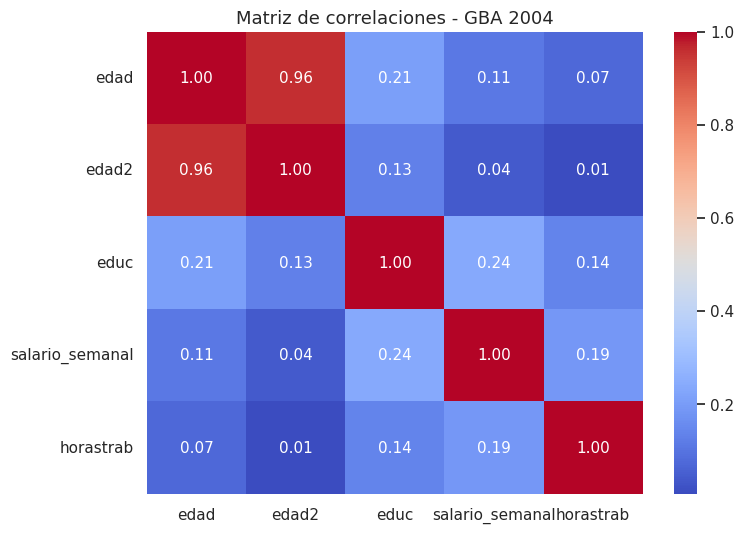

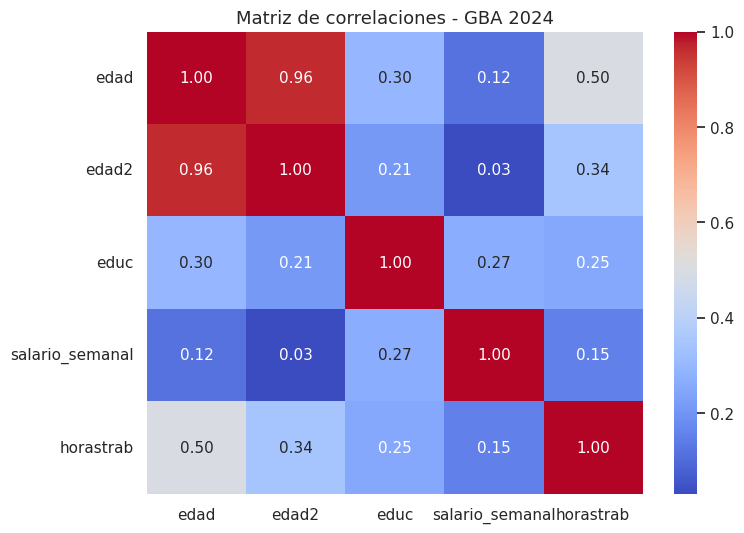

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las variables que pide el enunciado
variables = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# 2004
corr_2004 = individual_GBA_2004[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones - GBA 2004")
plt.show()

# 2024
corr_2024 = individual_GBA_2024[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones - GBA 2024")
plt.show()


En 2004, las correlaciones entre las demás variables son bastante bajas: la educación apenas se asocia con el salario semanal (0.24) y con las horas trabajadas (0.14), lo que sugiere un mercado laboral más desordenado o con alta informalidad.

En cambio, en 2024 las relaciones se vuelven más claras: a mayor educación, mayor salario (correlación de 0.35), y también más horas trabajadas (0.25). También se refuerza la relación entre horas trabajadas y salario (0.30). Esto podría reflejar una mayor formalización o profesionalización del empleo en la región.

In [ ]:
#parte 2, Ejercicio 2

In [106]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'ISLP'

In [86]:
scaler = StandardScaler(with_std=True, with_mean=True)

NameError: name 'StandardScaler' is not defined

In [85]:
print (df_total.mean())
print (df_total.std())

NameError: name 'df_total' is not defined

In [ ]:
df_estandarizado = pd.DataFrame(scaler.fit_transform(df_total), columns=df_total.columns)

In [ ]:
print ("Media luego de estandarizar:","\n",df_estandarizado.mean())
print ("Desvio estandar luego de estandarizar:","\n",df_estandarizado.std())

Media luego de estandarizar: 
 edad2              1.819426e-17
educ              -7.391418e-18
salario_semanal    4.093709e-17
horastrab         -6.822848e-18
ch06              -3.638852e-17
dtype: float64
Desvio estandar luego de estandarizar: 
 edad2              1.00004
educ               1.00004
salario_semanal    1.00004
horastrab          1.00004
ch06               1.00004
dtype: float64


In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df_estandarizado)

In [ ]:
scores = df_pca
print(scores)
print (scores.shape)

[[ 2.6285452  -1.17928987  0.65434417  0.46482757 -0.21834203]
 [ 1.7244659  -0.7656469   0.17779572  0.08093132  0.01944829]
 [ 2.30560255 -0.86962497  0.26459326  0.13643633 -0.11472952]
 ...
 [-1.35891209 -0.56516445  0.14913865  0.15776932  0.01580592]
 [-1.37749123 -0.50063829  0.06122661  0.08157903 -0.00569912]
 [-1.21353763 -0.58674517  0.17024519  0.17172713  0.06502669]]
(12497, 5)


Text(0.5, 1.0, 'Analisis de los primeros dos componentes principales de las variables pedidas')

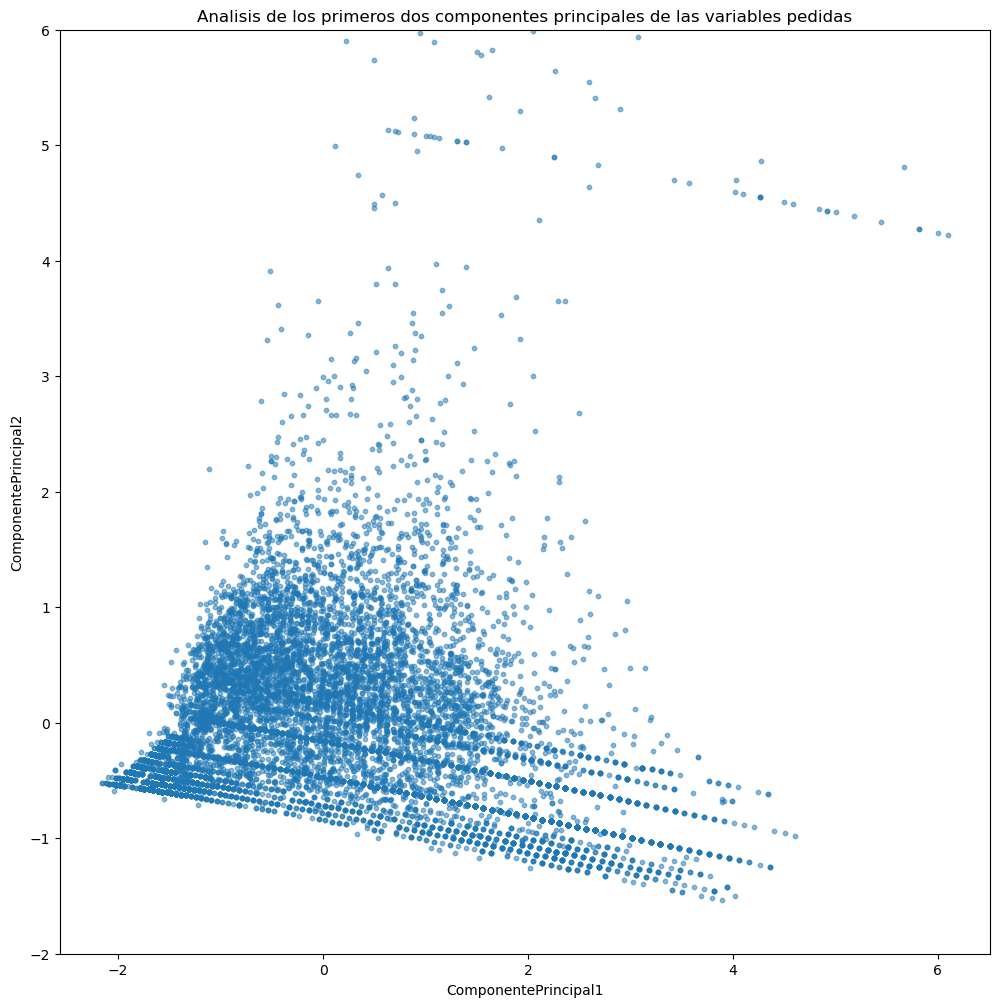

In [ ]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], alpha=0.5, s=10)
ax.set_xlabel('ComponentePrincipal%d' % (i+1))
ax.set_ylabel('ComponentePrincipal%d' % (j+1))
plt.ylim(-2, 6)
plt.savefig("gráfico part 2 ej 2.png", bbox_inches='tight', dpi=300)
plt.title('Analisis de los primeros dos componentes principales de las variables pedidas')

In [ ]:
#Ejercicio 3

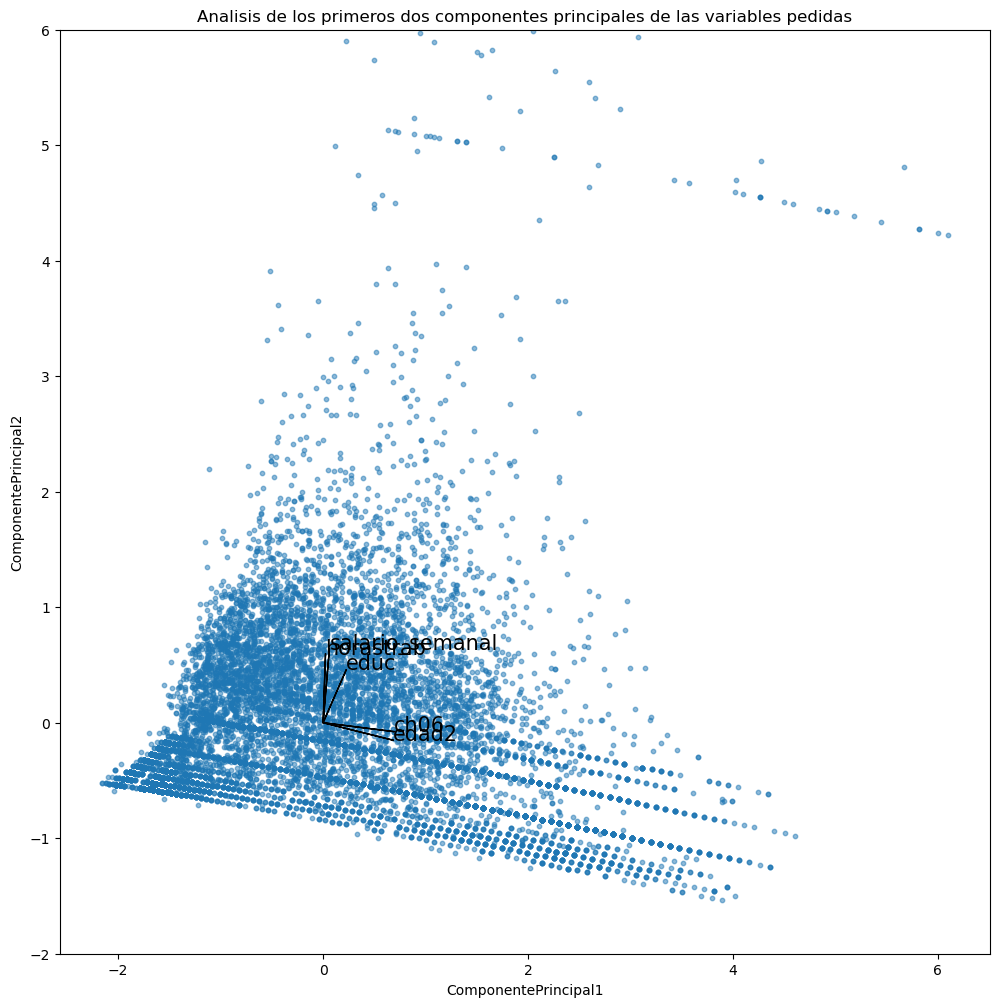

In [ ]:



i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], alpha=0.5, s=10)
ax.set_xlabel('ComponentePrincipal%d' % (i+1))
ax.set_ylabel('ComponentePrincipal%d' % (j+1))
plt.ylim(-2, 6)

plt.title('Analisis de los primeros dos componentes principales de las variables pedidas')
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[i,k], pca.components_[j,k], df_total.columns[k], fontsize=15)

plt.savefig("gráfico part 2 ej 3.png", bbox_inches='tight', dpi=300)

In [ ]:
#Ejercicio 4

In [ ]:
print(pca.explained_variance_ratio_)

[0.40490863 0.24330332 0.17786941 0.16855271 0.00536594]


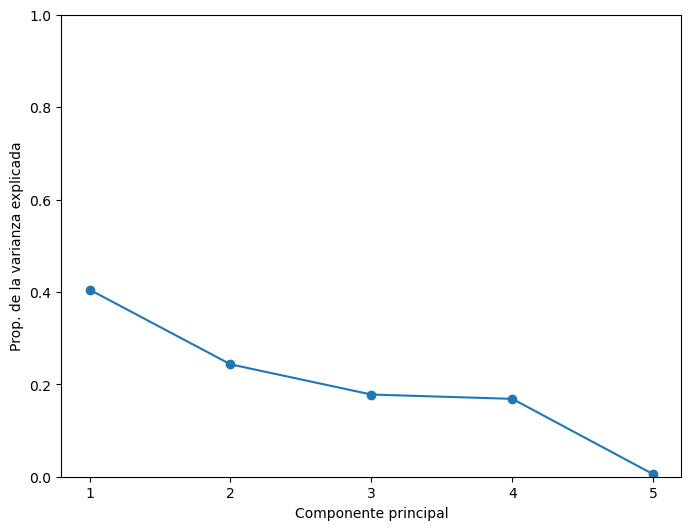

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Prop. de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
plt.savefig("gráfico part 2 ej 4.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
df_5 = individual_GBA_2024.copy()

In [ ]:
df_5 = df_5[["CH06", "P47T", "estado"]].dropna()
df_5 = df_5[df_5["estado"].isin(["Ocupado", "Desocupado"])]

In [ ]:
df_5 = df_5.rename(columns={"CH06": "edad", "P47T": "ingreso"})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_5[["edad", "ingreso"]])

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\Joaquin\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Joaquin\AppData\Local\anacond

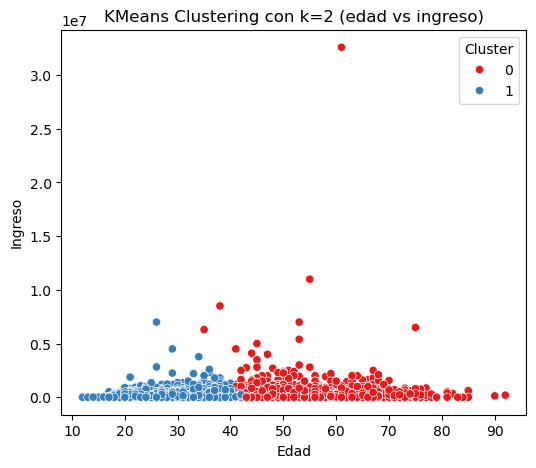

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=2 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a1.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

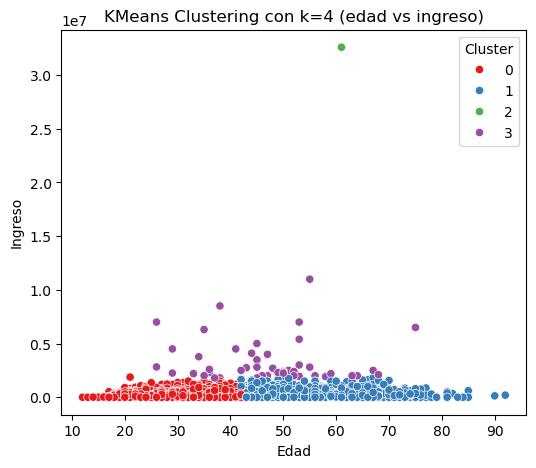

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=4 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a2.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

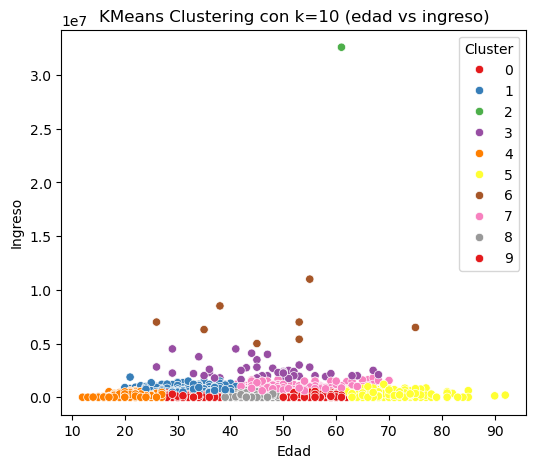

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=10 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a3.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
df_5b = individual_GBA_2024[
    individual_GBA_2024["estado"].isin(["Ocupado", "Desocupado"])
][["edad_2024_numeric", "educ", "estado"]].copy()
df_5b = df_5b.rename(columns={"edad_2024_numeric": "edad"})
df_5b["edad"] = pd.to_numeric(df_5b["edad"], errors="coerce")
df_5b["educ"] = pd.to_numeric(df_5b["educ"], errors="coerce")
df_5b = df_5b.dropna()

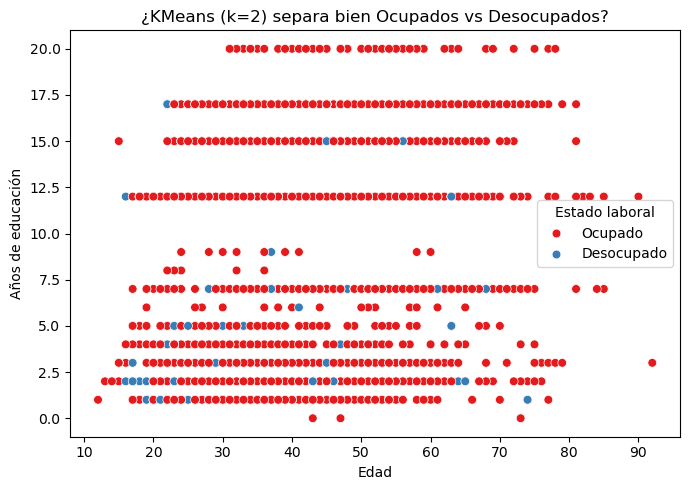

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_5b, x="edad", y="educ", hue="estado", palette="Set1", s=40)
plt.title("¿KMeans (k=2) separa bien Ocupados vs Desocupados?")
plt.xlabel("Edad")
plt.ylabel("Años de educación")
plt.legend(title="Estado laboral")
plt.tight_layout()
plt.savefig("gráfico part 2 ej 5b.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df_6 = individual_GBA_2024[["edad_2024_numeric", "educ"]].copy()
df_6 = df_6.rename(columns={"edad_2024_numeric": "edad"})
df_6["edad"] = pd.to_numeric(df_6["edad"], errors="coerce")
df_6["educ"] = pd.to_numeric(df_6["educ"], errors="coerce")
df_6 = df_6.dropna()

In [ ]:
if len(df_6) > 100:
    df_sample = df_6.sample(n=100, random_state=42)
else:
    df_sample = df_6.copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[["edad", "educ"]])

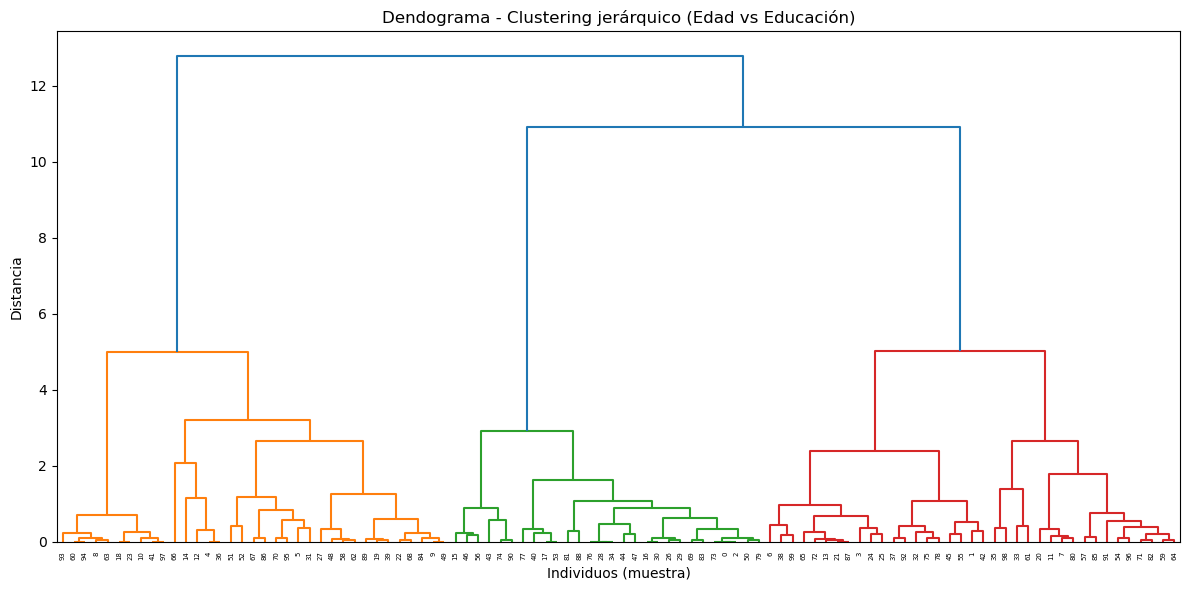

In [ ]:
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendograma - Clustering jerárquico (Edad vs Educación)")
plt.xlabel("Individuos (muestra)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.savefig("gráfico part 2 ej 6.png", bbox_inches='tight', dpi=300)
plt.show()